#### PGGM Data Science Bootcamp 2020
*Notebook by [Pedro V Hernandez Serrano](https://github.com/pedrohserrano)*

---
![](../img/image_3.png)

# 3. Data Wrangling with Pandas
* [3.1. Pandas Functions](#3.1)
* [3.2. Data Transformations](#3.2)

---

**[Pandas](http://pandas.pydata.org)** is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like `.csv`, `.tsv`, or `.xlsx`. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with `Matplotlib` and `Seaborn`, `Pandas` provides a wide range of opportunities for visual analysis of tabular data. 

The main data structures in `Pandas` are implemented with **Series** and **DataFrame** classes. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of `Series` instances. `DataFrames` are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.

# Book 
# http://bit.ly/2RJCXx3

![](../img/books.png)

---
### 3.1. Pandas Functions
<a id="3.1">

In [1]:
import pandas as pd

We’ll demonstrate the main methods in action by analyzing a sample dataset provided by PGGM. Let’s read the data (using `read_csv`), and take a look at the first 5 lines using the `head` method:

In [3]:
data = pd.read_csv('pggm_dataset.csv')

** Shape of the data **

In [4]:
data.head()

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth
0,17290810,Cintas Corporation,12/31/2014,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,Commercial & Professional Services,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,4.718765
1,80589M10,SCANA Corporation,12/31/2014,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,Utilities,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,-0.949881
2,50241310,L-3 Communications Holdings Inc.,12/31/2014,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,Capital Goods,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,-4.316938
3,91301710,United Technologies Corporation,12/31/2014,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,Capital Goods,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,3.083364
4,92939U10,Wisconsin Energy Corporation,12/31/2014,20141231,WEC-US,1.118696,7.679176,-6.160975,0.000616,Utilities,Utilities,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,1.421392


In [5]:
data.describe()

,Period_YYYYMMDD,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth
count,3.830400e+04,38300.000000,38296.000000,38268.000000,38304.000000,3.830400e+04,38304.000000,38246.000000,38245.000000,38288.000000,38215.000000,38197.000000
mean,2.017809e+07,0.037778,-0.025070,-0.534635,0.001593,3.828089e+04,111.173980,0.060218,5.842138,0.365269,0.039273,16.717226
std,7.340507e+03,3.982946,7.509304,11.969478,0.003048,7.374643e+04,178.296736,0.031881,7.245260,0.308932,0.056394,312.939623
min,2.014123e+07,-47.561474,-67.705421,-68.235580,0.000069,1.432547e+03,3.410000,-0.346678,-80.447959,-0.896646,-1.689621,-100.000000
25%,2.018021e+07,-1.843239,-4.256311,-7.583998,0.000403,9.659986e+03,45.170000,0.042177,1.739803,0.151267,0.020475,0.497268
50%,2.018053e+07,0.277680,0.329203,-0.362670,0.000652,1.568286e+04,73.820000,0.057110,4.923546,0.292937,0.040028,5.253313
75%,2.018091e+07,2.159980,4.400995,6.686374,0.001454,3.509461e+04,123.830000,0.076561,9.015668,0.504965,0.059893,11.886979
max,2.018123e+07,46.864033,63.502525,114.599991,0.044994,1.140656e+06,3646.690000,0.345388,64.735065,3.589774,0.383827,14039.748000


In [6]:
data.columns

Index(['Identifier', 'Name', 'Period', 'Period_YYYYMMDD', 'Ticker',
       'Universe_Returns_F1W', 'Universe_Returns_F4W', 'Universe_Returns_F12W',
       'Weight', 'GICS_Sector', 'GICS_Ind_Grp', 'Market_Cap_USD', 'Price_USD',
       'NTM_EP', 'LTM_ROA', 'BP', 'LTM_EP', '5Y_Sales_Growth'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38304 entries, 0 to 38303
Data columns (total 18 columns):
Identifier               38304 non-null object
Name                     38304 non-null object
Period                   38304 non-null object
Period_YYYYMMDD          38304 non-null int64
Ticker                   38304 non-null object
Universe_Returns_F1W     38300 non-null float64
Universe_Returns_F4W     38296 non-null float64
Universe_Returns_F12W    38268 non-null float64
Weight                   38304 non-null float64
GICS_Sector              38304 non-null object
GICS_Ind_Grp             38304 non-null object
Market_Cap_USD           38304 non-null float64
Price_USD                38304 non-null float64
NTM_EP                   38246 non-null float64
LTM_ROA                  38245 non-null float64
BP                       38288 non-null float64
LTM_EP                   38215 non-null float64
5Y_Sales_Growth          38197 non-null float64
dtypes: float64(11), int64(1), obje

In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter.

In [8]:
data.describe(include=['object'])

,Identifier,Name,Period,Ticker,GICS_Sector,GICS_Ind_Grp
count,38304,38304,38304,38304,38304,38304
unique,781,814,61,781,11,25
top,21036P10,eBay Inc.,9/30/2015,SLG-US,Information Technology,Software & Services
freq,61,61,637,61,6117,3507


For categorical (type `object`) and boolean (type `bool`) features we can use the `value_counts` method. Let’s have a look at the distribution of `Sector`:

To calculate fractions, pass `normalize=True` to the `value_counts` function.

In [9]:
data['GICS_Sector'].value_counts(normalize=True)

Information Technology    0.159696
Consumer Discretionary    0.157764
Financials                0.144737
Industrials               0.137009
Health Care               0.109649
Energy                    0.061534
Real Estate               0.059106
Consumer Staples          0.057357
Utilities                 0.051117
Materials                 0.048846
Communication Services    0.013184
Name: GICS_Sector, dtype: float64

### Sorting

A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by values of a variable (use ascending=False to sort in descending order):

In [10]:
data.sort_values(by='Price_USD', ascending=False)

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth
7049,62944T10,"NVR, Inc.",1/17/2018,20180117,NVR-US,-1.631343,-16.088015,-15.265626,0.000517,Consumer Discretionary,Consumer Durables & Apparel,12969.2300,3646.69,0.051379,19.738139,0.127477,0.038805,15.803665
7681,62944T10,"NVR, Inc.",1/24/2018,20180124,NVR-US,-11.402488,-11.211806,-15.226358,0.000502,Consumer Discretionary,Consumer Durables & Apparel,12757.6580,3587.20,0.053347,19.738139,0.127477,0.038805,15.803665
5785,62944T10,"NVR, Inc.",1-3-2018,20180103,NVR-US,-1.318616,-10.796475,-16.417854,0.000522,Consumer Discretionary,Consumer Durables & Apparel,12670.9870,3562.83,0.048533,19.738139,0.127477,0.038805,15.803665
6417,62944T10,"NVR, Inc.",1-10-2018,20180110,NVR-US,3.721428,-15.135461,-11.072147,0.000508,Consumer Discretionary,Consumer Durables & Apparel,12503.9060,3515.85,0.052303,19.738139,0.127477,0.038805,15.803665
5152,62944T10,"NVR, Inc.",12/27/2017,20171227,NVR-US,2.912486,3.616405,-10.324955,0.000512,Consumer Discretionary,Consumer Durables & Apparel,12312.3920,3462.00,0.049253,19.738139,0.127150,0.039176,15.803665
4519,62944T10,"NVR, Inc.",12/20/2017,20171220,NVR-US,1.228070,6.628358,-10.680115,0.000507,Consumer Discretionary,Consumer Durables & Apparel,12163.0210,3420.00,0.049719,19.738139,0.127150,0.039176,15.803665
3253,62944T10,"NVR, Inc.",12-6-2017,20171206,NVR-US,-0.113821,5.601633,-15.728969,0.000510,Consumer Discretionary,Consumer Durables & Apparel,11998.8560,3373.84,0.050118,19.738139,0.127150,0.039176,15.803665
3886,62944T10,"NVR, Inc.",12/13/2017,20171213,NVR-US,1.483679,4.327893,-11.305046,0.000503,Consumer Discretionary,Consumer Durables & Apparel,11985.1990,3370.00,0.050316,19.738139,0.127150,0.039176,15.803665
10209,62944T10,"NVR, Inc.",2/21/2018,20180221,NVR-US,-10.732782,-2.526206,-8.414734,0.000468,Consumer Discretionary,Consumer Durables & Apparel,11327.2940,3185.01,0.060763,19.083963,0.136863,0.040028,15.803665
8313,62944T10,"NVR, Inc.",1/31/2018,20180131,NVR-US,-6.118613,-10.540658,-2.421832,0.000447,Consumer Discretionary,Consumer Durables & Apparel,11302.9680,3178.17,0.060424,19.738139,0.140715,0.042834,15.803665


### Missing values

In [11]:
mis_val = data.isnull().sum()
mis_val_percent = 100 * data.isnull().sum()/len(data)
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

In [12]:
data.isnull().sum()

Identifier                 0
Name                       0
Period                     0
Period_YYYYMMDD            0
Ticker                     0
Universe_Returns_F1W       4
Universe_Returns_F4W       8
Universe_Returns_F12W     36
Weight                     0
GICS_Sector                0
GICS_Ind_Grp               0
Market_Cap_USD             0
Price_USD                  0
NTM_EP                    58
LTM_ROA                   59
BP                        16
LTM_EP                    89
5Y_Sales_Growth          107
dtype: int64

**Direct replacement**

In [13]:
data[data.Universe_Returns_F1W.isnull()]['Universe_Returns_F1W']

2862    NaN
19657   NaN
35229   NaN
35411   NaN
Name: Universe_Returns_F1W, dtype: float64

In [14]:
data.loc[[2862,19657,35229,35411],'Universe_Returns_F1W'] = 0

**Loop replacement**

In [15]:
indexes_to_check = data[data.Universe_Returns_F4W.isnull()].index

In [16]:
for i in indexes_to_check:
    data.loc[i,'Universe_Returns_F4W'] = 0

**Just Fill in**

In [17]:
data.Universe_Returns_F12W.fillna(value=1, inplace=True)

**Also with operations**

In [18]:
NTM_EP_mean = data.NTM_EP.mean()

In [19]:
data.NTM_EP.fillna(value=NTM_EP_mean, inplace=True)

**Or just don't take the na events into account**

In [20]:
data.dropna(inplace=True)

### Data update

Let's suppose we don't need the commas

In [21]:
data.Name.loc[7].replace(',','')

'ANSYS Inc.'

In [22]:
data.loc[7,'Name'] = data.Name.loc[7].replace(',','')

In [23]:
data.loc[7,'Name']

'ANSYS Inc.'

In [24]:
for i in data.index:
    data.loc[i,'Name'] = data.Name.loc[i].replace(',','')

### Handling Datetime

In [1]:
#data.Period_YYYYMMDD

In [2]:
#[len(str(i)) for i in data.Period_YYYYMMDD]

In [27]:
data.Period_YYYYMMDD.map(str).map(len).unique()

array([8])

** Updateting via list comprehension** 

In [28]:
data.Period = [pd.to_datetime(i, format='%Y%m%d') for i in data.Period_YYYYMMDD]

** Creating periods **

In [29]:
data['month'] = [date.month for date in data.Period]

In [30]:
data['day'] = [date.day for date in data.Period]

In [31]:
data['year'] = [date.year for date in data.Period]

In [32]:
data.Period.describe()

count                   38115
unique                     61
top       2018-04-04 00:00:00
freq                      630
first     2014-12-31 00:00:00
last      2018-12-26 00:00:00
Name: Period, dtype: object

---
### 3.2. Data Transformations
<a id="3.2">

Supose it is needed a subset of the dataset

In [33]:
data.GICS_Sector.unique()

array(['Industrials', 'Utilities', 'Information Technology',
       'Health Care', 'Financials', 'Consumer Staples',
       'Consumer Discretionary', 'Materials', 'Energy',
       'Communication Services', 'Real Estate'], dtype=object)

** Slicing with logical operations **

In [34]:
IT_2018_df = data[(data.GICS_Sector == 'Information Technology') & (data.year == 2018)]

** Columns selection **

In [35]:
IT_2018_df.columns

Index(['Identifier', 'Name', 'Period', 'Period_YYYYMMDD', 'Ticker',
       'Universe_Returns_F1W', 'Universe_Returns_F4W', 'Universe_Returns_F12W',
       'Weight', 'GICS_Sector', 'GICS_Ind_Grp', 'Market_Cap_USD', 'Price_USD',
       'NTM_EP', 'LTM_ROA', 'BP', 'LTM_EP', '5Y_Sales_Growth', 'month', 'day',
       'year'],
      dtype='object')

** Explicit**

In [36]:
IT_2018_df_ = IT_2018_df[['Ticker','Name','Period','Price_USD']]

** Range **

In [37]:
IT_2018_df[IT_2018_df.columns[2:6]].head()

,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W
5668,2018-01-03,20180103,ANSS-US,0.455689
5676,2018-01-03,20180103,ADSK-US,1.910770
5680,2018-01-03,20180103,ADI-US,-1.411378
5686,2018-01-03,20180103,SYMC-US,-0.864750
5690,2018-01-03,20180103,XLNX-US,7.019067


** Exception **

In [38]:
IT_2018_df_.iloc[:,~IT_2018_df_.columns.isin(['index','Period_YYYYMMDD','month','day','year'])].head()

,Ticker,Name,Period,Price_USD
5668,ANSS-US,ANSYS Inc.,2018-01-03,151.42
5676,ADSK-US,Autodesk Inc.,2018-01-03,109.38
5680,ADI-US,Analog Devices Inc.,2018-01-03,91.40
5686,SYMC-US,Symantec Corporation,2018-01-03,28.91
5690,XLNX-US,Xilinx Inc.,2018-01-03,69.24


** Pivoting **

In [39]:
summary_IT = pd.pivot_table(IT_2018_df_, index='Name', columns='Period')

** Transposing **

In [40]:
transposed = summary_IT.T

In [41]:
transposed.head()

Name                  ANSYS Inc.  Accenture Plc Class A  \
          Period                                          
Price_USD 2018-01-03      151.42                 154.55   
          2018-01-10      152.11                 158.90   
          2018-01-17      155.75                 160.21   
          2018-01-24      161.54                 160.60   
          2018-01-31      161.65                 160.70   

Name                  Activision Blizzard Inc.  Adobe Inc.  \
          Period                                             
Price_USD 2018-01-03                     65.31      181.04   
          2018-01-10                     66.83      187.11   
          2018-01-17                     70.36      196.49   
          2018-01-24                     70.08      197.78   
          2018-01-31                     74.13      199.76   

Name                  Advanced Micro Devices Inc.  Akamai Technologies Inc.  \
          Period                                                              
Price_USD 2018-01-03                        11.55                     65.94   
          2018-01-10                        11.96                     66.33   
          2018-01-17                        12.18                     65.40   
          2018-01-24                        12.71                     66.02   
          2018-01-31                        13.74                     66.99   

Name                  Alliance Data Systems Corporation  \
          Period                                          
Price_USD 2018-01-03                             260.07   
          2018-01-10                             272.09   
          2018-01-17                             258.26   
          2018-01-24                             259.49   
          2018-01-31                             256.66   

Name                  Alphabet Inc. Class A  Alphabet Inc. Class C  \
          Period                                                     
Price_USD 2018-01-03                1091.52                1082.48   
          2018-01-10                1110.14                1102.61   
          2018-01-17                1139.10                1131.98   
          2018-01-24                1171.29                1164.24   
          2018-01-31                1182.22                1169.94   

Name                  Amphenol Corporation Class A  ...  Visa Inc. Class A  \
          Period                                    ...                      
Price_USD 2018-01-03                         88.94  ...             115.65   
          2018-01-10                         89.51  ...             118.98   
          2018-01-17                         92.85  ...             121.98   
          2018-01-24                         91.20  ...             124.55   
          2018-01-31                         92.77  ...             124.23   

Name                  Western Digital Corporation  Western Union Company  \
          Period                                                           
Price_USD 2018-01-03                        82.67                  19.07   
          2018-01-10                        80.91                  21.23   
          2018-01-17                        85.16                  20.24   
          2018-01-24                        86.97                  20.52   
          2018-01-31                        88.98                  20.79   

Name                  Workday Inc. Class A  Worldpay Inc. Class A  \
          Period                                                    
Price_USD 2018-01-03                105.17                  74.32   
          2018-01-10                114.14                  75.71   
          2018-01-17                112.26                  77.89   
          2018-01-24                115.87                  79.63   
          2018-01-31                119.89                  80.31   

Name                  Xerox Corporation  Xilinx Inc.  \
          Period                                       
Price_USD 2018-0

## Write to file

In [42]:
transposed.to_csv('name_of_file.csv')

In [43]:
!rm name_of_file.csv

## Adding Features

We can always extend the knowledge of the dataset, spliting apart or creating new variables

** Labeling **

In [44]:
market_label = []
for i in data.Market_Cap_USD:
    if i >= 38000:
        market_label.append('>38')
    elif (i < 38000) | (i > 20000):
        market_label.append('<28 & >20')
    else:
        market_label.append('<20')

In [45]:
data['market_label'] = market_label

** Opeations **

In [46]:
data['LTM_AVG'] = (data.LTM_ROA + data.LTM_EP) /2

** Fixed values **

In [47]:
data['extra'] = ['extra'] * len(data)

** Aggregations **

In [48]:
year_distr = data.groupby('year').count()['Identifier'].reset_index().sort_values('year')

In [49]:
year_distr['relative'] = year_distr.Identifier / year_distr.Identifier.sum() *100

** Sorting **

In [50]:
data.groupby('Identifier').count()['Name'].sort_values(ascending=False).head()

Identifier
Y2573F10    61
14365830    61
55002110    61
55261F10    61
15678210    61
Name: Name, dtype: int64

** Merging **

In [51]:
df_Y2573F10 = data[data.Identifier == 'Y2573F10']

In [52]:
df_Y2573F10 = df_Y2573F10[['Period','Market_Cap_USD','Name']]

In [53]:
df_14365830 = data[data.Identifier == '14365830']

In [54]:
df_14365830 = df_14365830[['Period','Market_Cap_USD','Name']]

In [55]:
portfolio_two = pd.merge(df_Y2573F10, df_14365830, on='Period', how='inner')

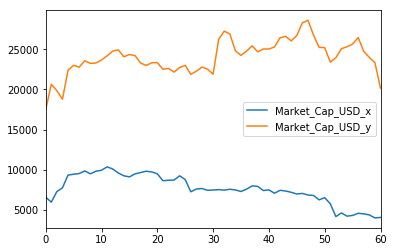

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
portfolio_two._get_numeric_data().plot()

### Writing files

In [57]:
excelbook = pd.ExcelWriter('output.xlsx')

In [58]:
portfolio_two.to_excel(excelbook, 'sheet1')
portfolio_two.to_excel(excelbook, 'sheet2')
excelbook.save()

Pandas, overall, is one of the reason why Python is such a great software. 
There are many other interesting pandas features I could have shown, but it’s already enough to understand why a data scientist cannot do without pandas. To sum up, pandas is simple to use, hiding all the complex and abstract computations behind (generally) intuitive fast, if not the fastest data analysis package (it highly optimized in C) It is THE tool that helps a data scientist to quickly read and understand data and be more efficient at his role.

### Data Exploration

Data Dimension Milestones

- Data shape
- Datasets Treatment  
- Variables Analysis  
- Descriptive Statistics  

In [ ]:
tuples = []
for column in data.columns:
    tuples.append((column, data[str(column)].map(type).unique()))

In [ ]:
year_distr =data.groupby('year').count()['Identifier'].reset_index().sort_values('year')

In [ ]:
year_distr['relative'] = year_distr.Identifier / year_distr.Identifier.sum() *100

** Uniqueness **

In [ ]:
sector = data.GICS_Sector.unique()

In [ ]:
print(len(sector), sector)

In [ ]:
plt.barh(df_sector.GICS_Sector, df_sector.relative)

#### Now with the other category

In [ ]:
df_ind_grp = data.groupby('GICS_Ind_Grp').count()['Identifier'].reset_index().sort_values(by='Identifier')

In [ ]:
plt.figure(figsize=(10,7))
plt.barh(df_ind_grp.GICS_Ind_Grp,df_ind_grp.Identifier)

#### Now we go with the continous variables

In [ ]:
df_assets.Price_USD.mean()

In [ ]:
df_assets.Price_USD.std()

In [ ]:
df_assets._get_numeric_data().describe().T

Let's take the market capital and plot it over the time

In [ ]:
df_assets.groupby('Period').mean()['Market_Cap_USD'].plot()